In [33]:
# portfolio Project
import boto3
import pandas as pd
import io

In [34]:
# Initialize S3 client
s3 = boto3.client('s3')

# Specify the bucket name and file key
bucket_name = 'bihani-portfolio-project-1'
file_key = 'oral_cancer_prediction_dataset.csv'

# Get the object from S3
csv_obj = s3.get_object(Bucket=bucket_name, Key=file_key)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

# Read the CSV into a Pandas DataFrame
df = pd.read_csv(io.StringIO(csv_string))

# Quick look at the DataFrame
print(df.head())

   ID       Country  Age  Gender Tobacco Use Alcohol Consumption  \
0   1         Italy   36  Female         Yes                 Yes   
1   2         Japan   64    Male         Yes                 Yes   
2   3            UK   37  Female          No                 Yes   
3   4     Sri Lanka   55    Male         Yes                 Yes   
4   5  South Africa   68    Male          No                  No   

  HPV Infection Betel Quid Use Chronic Sun Exposure Poor Oral Hygiene  \
0           Yes             No                   No               Yes   
1           Yes             No                  Yes               Yes   
2            No             No                  Yes               Yes   
3            No            Yes                   No               Yes   
4            No             No                   No               Yes   

  Diet (Fruits & Vegetables Intake) Family History of Cancer  \
0                               Low                       No   
1                       

Perfrom EDA

In [35]:
df.describe()

,ID,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year)
count,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000
mean,42461.500000,54.509444,1.747294,1.118756,79.503364,39109.881244,52.028391
std,24515.014117,10.014839,2.028199,1.340418,26.483746,44710.687054,60.389796
min,1.000000,15.000000,0.000000,0.000000,10.000750,0.000000,0.000000
25%,21231.250000,48.000000,0.000000,0.000000,65.233425,0.000000,0.000000
50%,42461.500000,55.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,63691.750000,61.000000,3.480075,2.000000,100.000000,76468.437500,104.000000
max,84922.000000,101.000000,5.999899,4.000000,100.000000,159988.000000,179.000000


In [36]:
df.shape

(84922, 25)

In [37]:
df.dtypes

ID                                            int64
Country                                      object
Age                                           int64
Gender                                       object
Tobacco Use                                  object
Alcohol Consumption                          object
HPV Infection                                object
Betel Quid Use                               object
Chronic Sun Exposure                         object
Poor Oral Hygiene                            object
Diet (Fruits & Vegetables Intake)            object
Family History of Cancer                     object
Compromised Immune System                    object
Oral Lesions                                 object
Unexplained Bleeding                         object
Difficulty Swallowing                        object
White or Red Patches in Mouth                object
Tumor Size (cm)                             float64
Cancer Stage                                  int64
Treatment Ty

In [38]:
print(df.isnull().sum())

ID                                          0
Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)           

In [39]:
df.columns

Index(['ID', 'Country', 'Age', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Tumor Size (cm)', 'Cancer Stage',
       'Treatment Type', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)',
       'Early Diagnosis', 'Oral Cancer (Diagnosis)'],
      dtype='object')

In [40]:
# Convert binary categorical variables to numeric
binary_cols = ['Tobacco Use', 'Alcohol Consumption', 'HPV Infection', 'Betel Quid Use', 
               'Chronic Sun Exposure', 'Poor Oral Hygiene', 'Family History of Cancer',
               'Compromised Immune System', 'Oral Lesions', 'Unexplained Bleeding',
               'Difficulty Swallowing', 'White or Red Patches in Mouth', 'Early Diagnosis',
               'Oral Cancer (Diagnosis)']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [46]:
print("\nDiet categories:")
print(df['Diet (Fruits & Vegetables Intake)'].unique())


Diet categories:
[1 3 2]


In [41]:
# Ordinal encoding for Diet
diet_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
df['Diet (Fruits & Vegetables Intake)'] = df['Diet (Fruits & Vegetables Intake)'].map(diet_mapping)

In [42]:
# Convert Cancer Stage into categorical type
df['Cancer Stage'] = df['Cancer Stage'].astype('category')

In [43]:
# Convert numeric columns explicitly
numeric_cols = ['Age', 'Tumor Size (cm)', 'Survival Rate (5-Year, %)', 
                'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [44]:
# Drop ID column (no analytical use)
df.drop(columns=['ID'], inplace=True)

In [45]:
df.head()

,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,Italy,36,Female,1,1,1,0,0,1,1,0,0,0,0,0,0,0.000000,0,No Treatment,100.000000,0.00,0,0,0
1,Japan,64,Male,1,1,1,0,1,1,3,0,0,0,1,0,0,1.782186,1,No Treatment,83.340103,77772.50,177,0,1
2,UK,37,Female,0,1,0,0,1,1,2,0,0,0,0,0,1,3.523895,2,Surgery,63.222871,101164.50,130,1,1
3,Sri Lanka,55,Male,1,1,0,1,0,1,2,0,0,1,0,0,0,0.000000,0,No Treatment,100.000000,0.00,0,1,0
4,South Africa,68,Male,0,0,0,0,0,1,3,0,0,0,0,0,0,2.834789,3,No Treatment,44.293199,45354.75,52,0,1


In [50]:
# Value counts for categorical columns
print("\nTreatment Type:\n", df['Treatment Type'].value_counts())
print("\nDiet Intake:\n", df['Diet (Fruits & Vegetables Intake)'].value_counts())
print("\nOral Cancer Diagnosis:\n", df['Oral Cancer (Diagnosis)'].value_counts())


Treatment Type:
 Treatment Type
No Treatment        51016
Chemotherapy         8529
Surgery              8500
Targeted Therapy     8465
Radiation            8412
Name: count, dtype: int64

Diet Intake:
 Diet (Fruits & Vegetables Intake)
2    33914
1    33896
3    17112
Name: count, dtype: int64

Oral Cancer Diagnosis:
 Oral Cancer (Diagnosis)
0    42573
1    42349
Name: count, dtype: int64


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

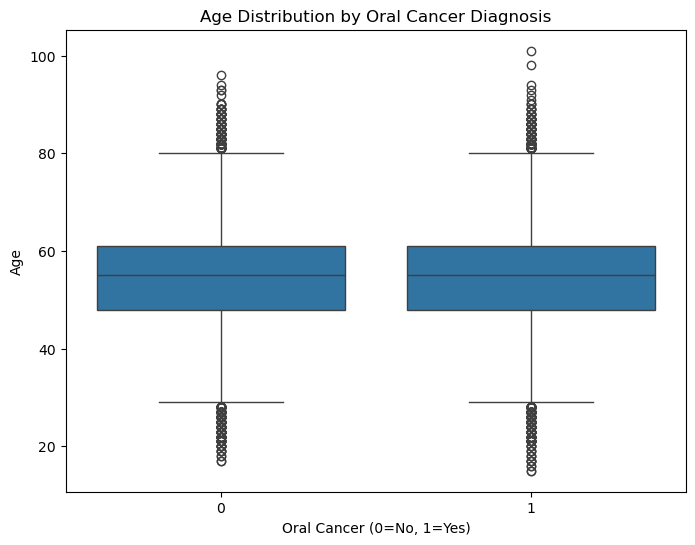

In [53]:
#Visualization of Age Distribution by Oral Cancer Diagnosis
plt.figure(figsize=(8,6))
sns.boxplot(x='Oral Cancer (Diagnosis)', y='Age', data=df)
plt.title('Age Distribution by Oral Cancer Diagnosis')
plt.xlabel('Oral Cancer (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

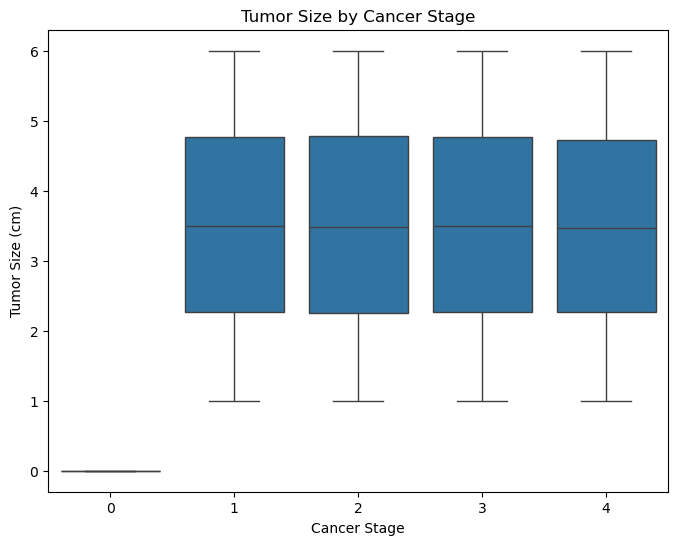

In [54]:
#Tumor Size by Cancer Stage
plt.figure(figsize=(8,6))
sns.boxplot(x='Cancer Stage', y='Tumor Size (cm)', data=df)
plt.title('Tumor Size by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Tumor Size (cm)')
plt.show()

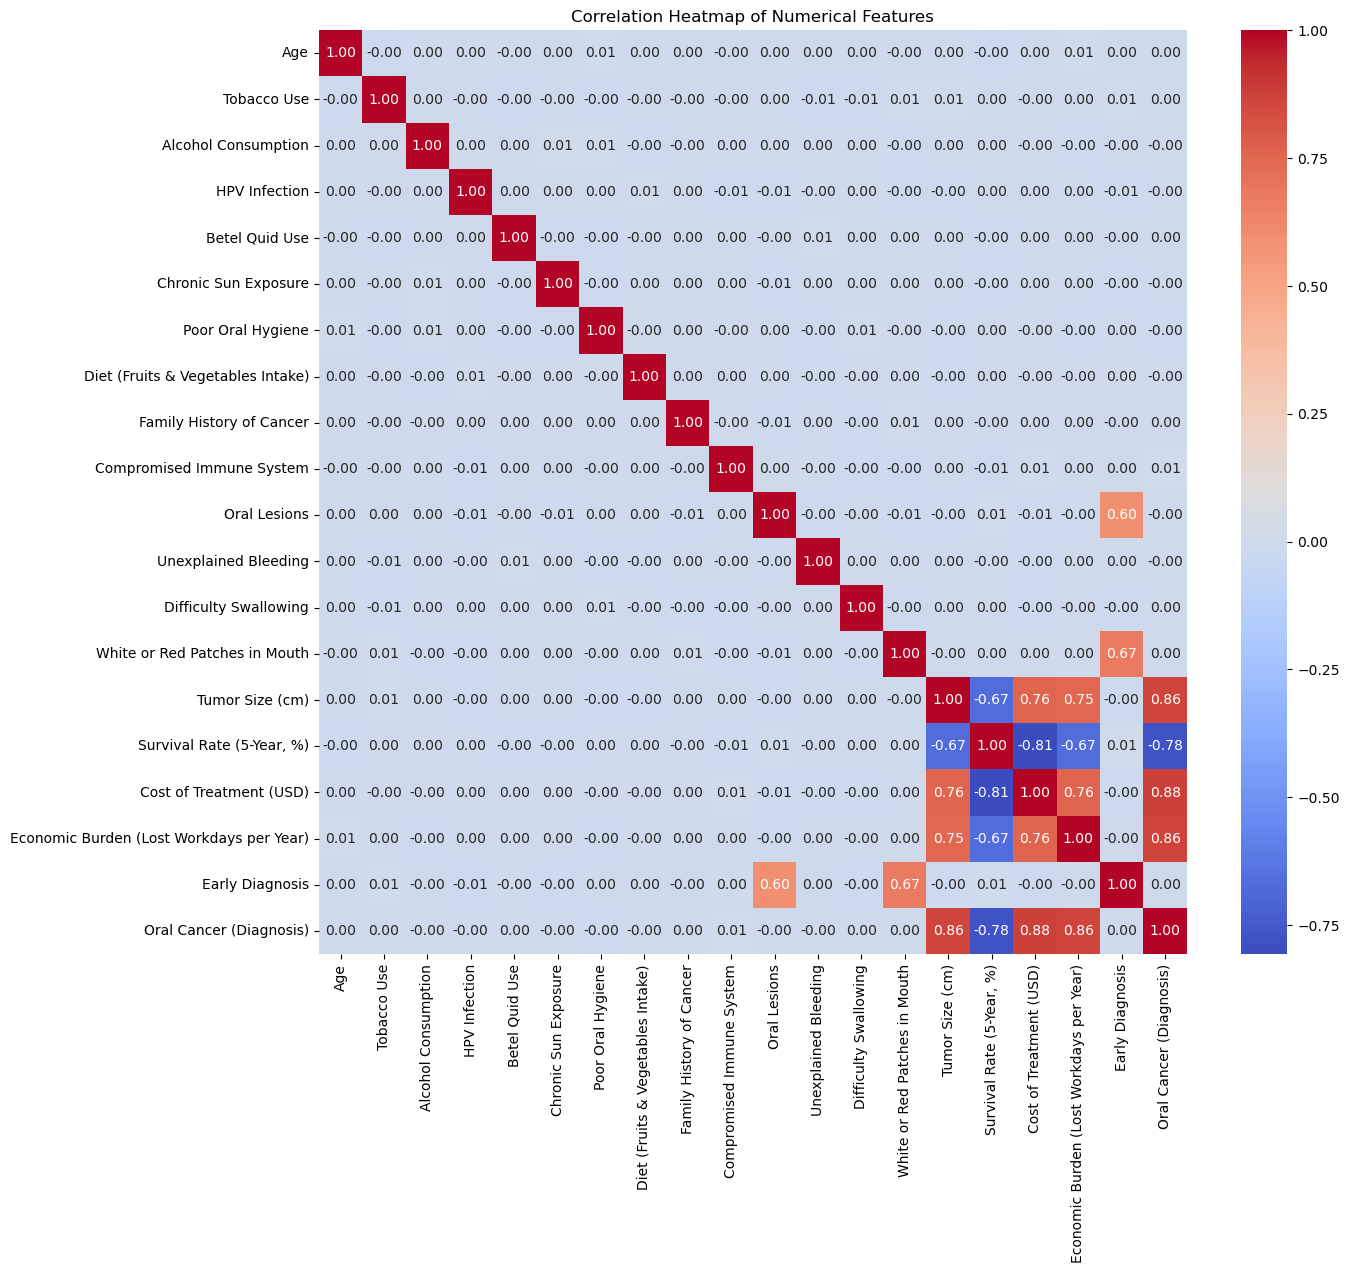

In [55]:
#Correlation Heatmap
plt.figure(figsize=(14,12))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

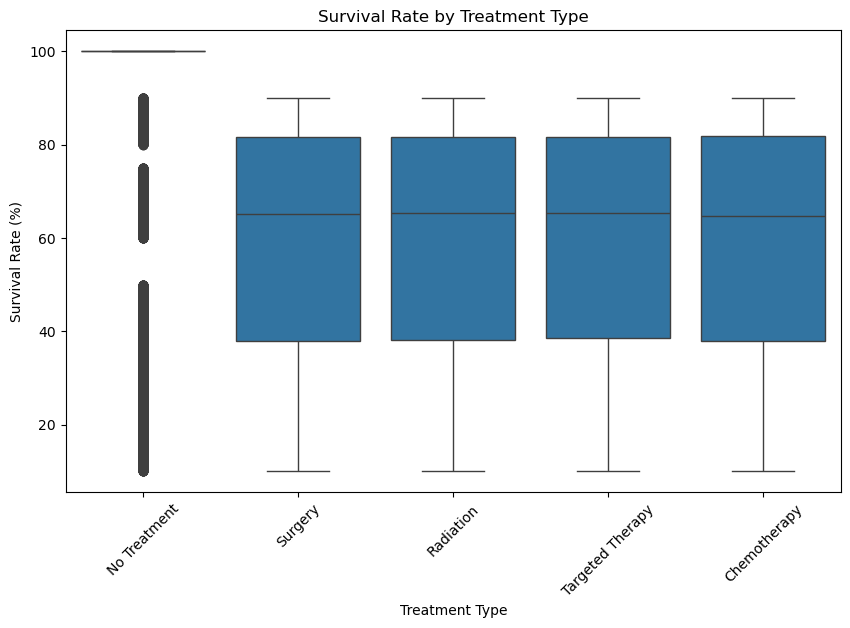

In [56]:
# Analysis of Survival Rate by Treatment Type
plt.figure(figsize=(10,6))
sns.boxplot(x='Treatment Type', y='Survival Rate (5-Year, %)', data=df)
plt.title('Survival Rate by Treatment Type')
plt.xticks(rotation=45)
plt.ylabel('Survival Rate (%)')
plt.show()


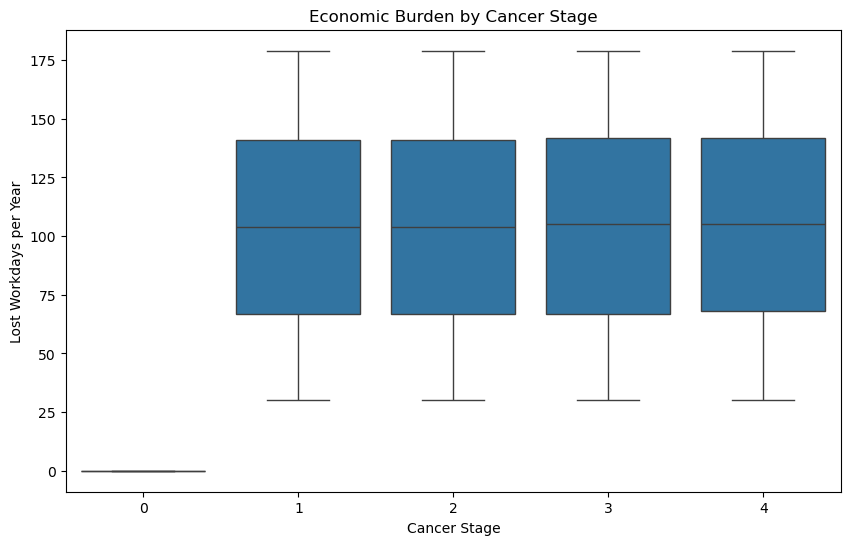

In [57]:
#Economic Burden Analysis
plt.figure(figsize=(10,6))
sns.boxplot(x='Cancer Stage', y='Economic Burden (Lost Workdays per Year)', data=df)
plt.title('Economic Burden by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Lost Workdays per Year')
plt.show()

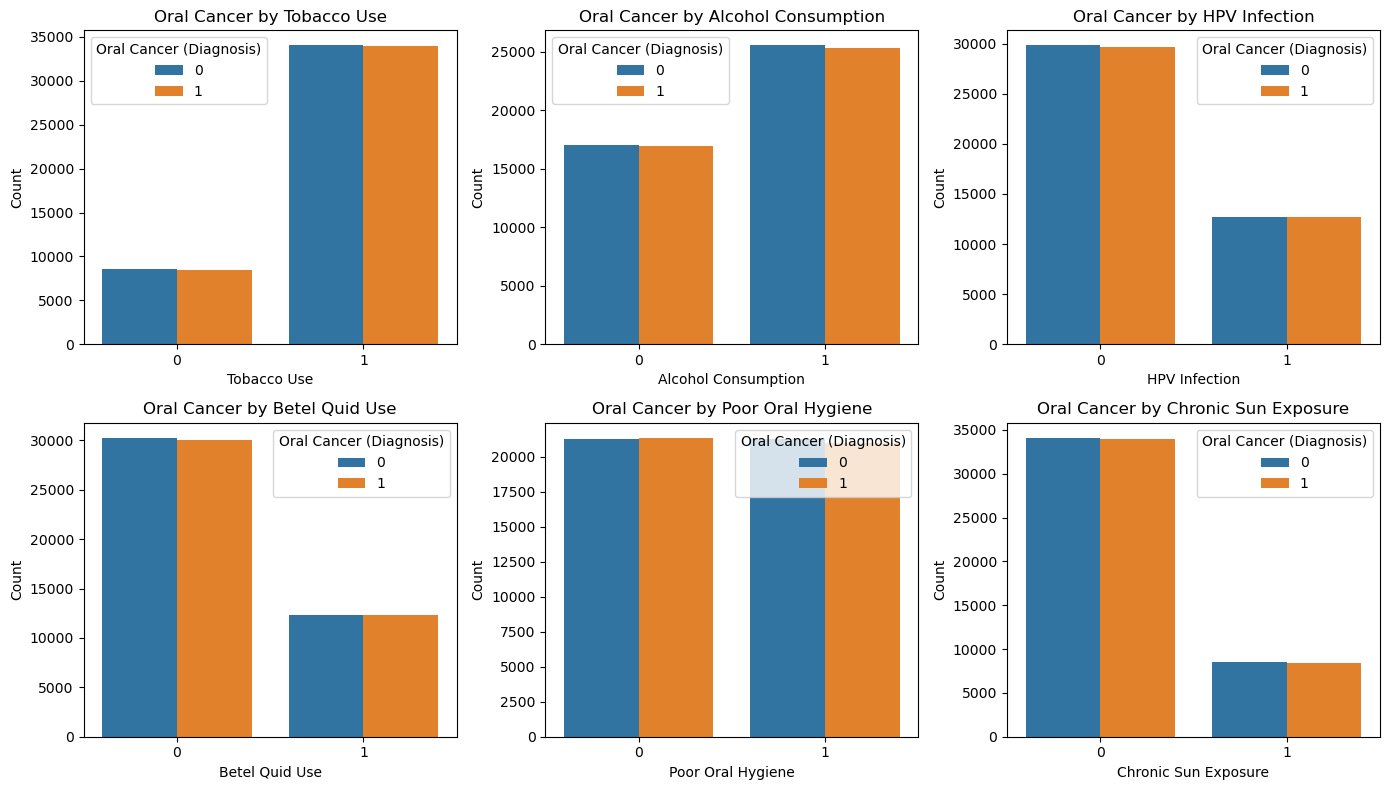

In [58]:
#Countplot of Cancer Diagnosis vs. Risk Factors
risk_factors = ['Tobacco Use', 'Alcohol Consumption', 'HPV Infection', 
                'Betel Quid Use', 'Poor Oral Hygiene', 'Chronic Sun Exposure']

plt.figure(figsize=(14, 8))

for i, factor in enumerate(risk_factors, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=factor, hue='Oral Cancer (Diagnosis)', data=df)
    plt.title(f'Oral Cancer by {factor}')
    plt.xlabel(factor)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

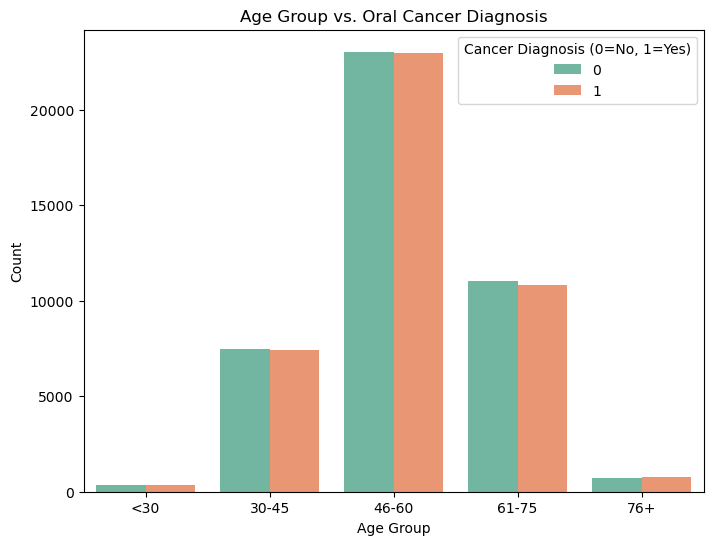

In [60]:
# Age Group Segmentation
# Create Age groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 75, 100], 
                         labels=['<30', '30-45', '46-60', '61-75', '76+'])

# Plot age groups vs oral cancer diagnosis
plt.figure(figsize=(8,6))
sns.countplot(x='Age Group', hue='Oral Cancer (Diagnosis)', data=df, palette='Set2')
plt.title('Age Group vs. Oral Cancer Diagnosis')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Cancer Diagnosis (0=No, 1=Yes)')
plt.show()

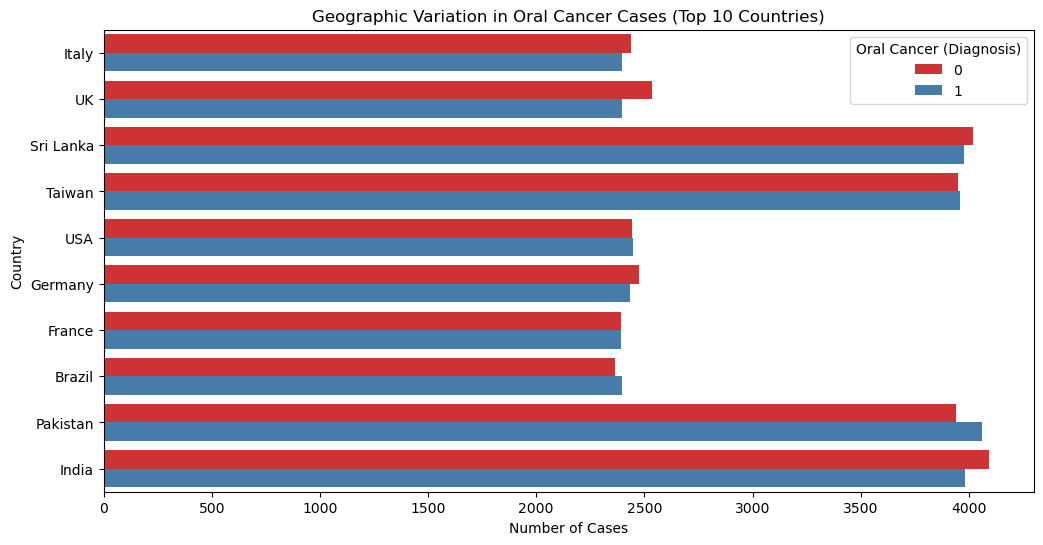

In [73]:
# Geographic Variations
# Find top 10 countries by case count
top_countries = df['Country'].value_counts().nlargest(10).index

# Plotting
plt.figure(figsize=(12,6))
sns.countplot(y='Country', hue='Oral Cancer (Diagnosis)', 
            data=df[df['Country'].isin(top_countries)], palette='Set1')
plt.title('Geographic Variation in Oral Cancer Cases (Top 10 Countries)')
plt.xlabel('Number of Cases')
plt.ylabel('Country')
plt.show()

Predictive Model

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Problem Solving

In [ ]:
# Define feature columns 
features = ['Age', 'Tobacco Use', 'Alcohol Consumption', 'HPV Infection', 
            'Betel Quid Use', 'Chronic Sun Exposure', 'Poor Oral Hygiene',
            'Diet (Fruits & Vegetables Intake)', 'Tumor Size (cm)', 
            'Cancer Stage', 'Early Diagnosis']

In [83]:
# Create a sample patient with all required features
sample_patient = pd.DataFrame({
    'Age': [55],
    'Tobacco Use': [1],
    'Alcohol Consumption': [1],
    'HPV Infection': [0],
    'Betel Quid Use': [0],
    'Chronic Sun Exposure': [0],
    'Poor Oral Hygiene': [1],
    'Diet (Fruits & Vegetables Intake)': [1],
    'Tumor Size (cm)': [2.5],  
    'Cancer Stage': [2],       
    'Early Diagnosis': [1]
})

In [79]:
# Train-test split for consistency
X = df[features]  # Ensure training features match
y = df['Oral Cancer (Diagnosis)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Perform prediction
prediction = model.predict(sample_patient)

print("Cancer Prediction (1=Positive, 0=Negative):", prediction[0])

Cancer Prediction (1=Positive, 0=Negative): 1


In [80]:
high_risk_group = df[
    (df['Age'].between(45, 60)) &
    (df['Tobacco Use'] == 1) &
    (df['Alcohol Consumption'] == 1) &
    (df['Poor Oral Hygiene'] == 1)
]

print("High-risk group size:", len(high_risk_group))

High-risk group size: 11534


In [82]:
sample_patient = pd.DataFrame({
    'Age': [55],
    'Tobacco Use': [1],
    'Alcohol Consumption': [1],
    'HPV Infection': [0],
    'Betel Quid Use': [0],
    'Chronic Sun Exposure': [0],
    'Poor Oral Hygiene': [1],
    'Diet (Fruits & Vegetables Intake)': [1],
    'Tumor Size (cm)': [2.5],
    'Cancer Stage': [2],
    'Early Diagnosis': [1]
})

prediction = model.predict(sample_patient)
print("Cancer Prediction (1=Positive, 0=Negative):", prediction[0])

Cancer Prediction (1=Positive, 0=Negative): 1


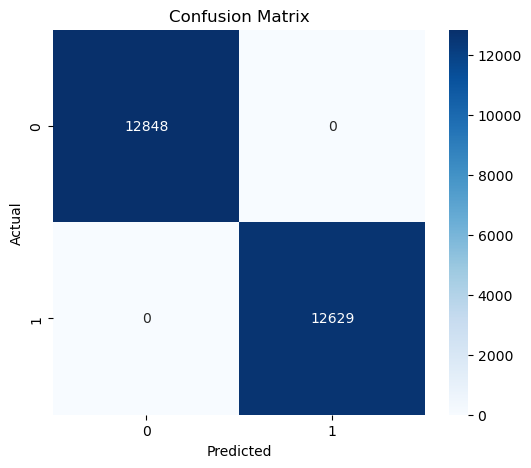

In [84]:
# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()